# Predicting the Sales Price of Bulldozers 🚜 using machine learning💻

With the goal of predicting the sale price of bulldozers.

## 1. Problem Defination
> Predicting the future sale price of a bulldozer, given its characteristic and similar examples from the past regading the sales.

## 2. Data
The data is downloaded from the [Kaggle Bluebook for buldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/data).There are Three main data sets.
   1. Train.csv is the training set, which contains data through the end of 2011.
   2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this         set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
   3. Test.csv is the test set.

The key fields are in train.csv are:

    SalesID: the uniue identifier of the sale
    MachineID: the unique identifier of a machine.  A machine can be sold multiple times
    saleprice: what the machine sold for at auction (only provided in train.csv)
    saledate: the date of the sale


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. In simple words we have to minimise the RSME for the model againts the test set of the data.

## 4. Features
One can View the full description of the data here on Kaggle. https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [2]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [31]:
#Importing the training and validation sets
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

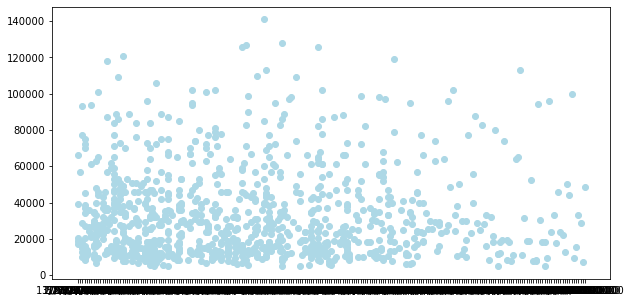

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000], color='lightblue')

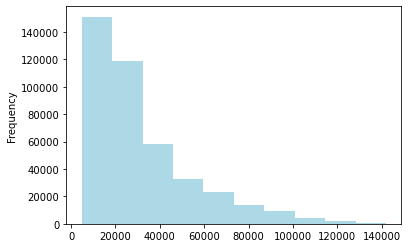

In [34]:
df.SalePrice.plot.hist(color='lightblue');

#### Parsing Dates
As it is the Time Series Data we can encode `saledate` into DateTime object

In [35]:
# import data again
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [36]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

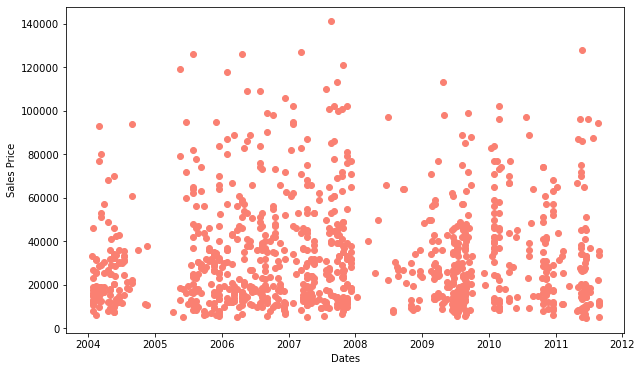

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000], color='salmon')
ax.set(xlabel='Dates', ylabel= 'Sales Price');

In [38]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

In [39]:
# Sort DataFrame in dateorder
df.sort_values(by=["saledate"], inplace= True, ascending= True)

In [40]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [93]:
##Make a copy of the original DataFrame
df_temp = df.copy()

### Add DateTime Parameters for `saledate` column

In [94]:
df_temp['saleYear'] = df_temp['saledate'].dt.year
df_temp['saleMonth'] = df_temp['saledate'].dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfyear']  = df_temp.saledate.dt.dayofyear

In [95]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [96]:
## We have enriched the dataFarme with all datetime featires we can remove this 'saledate' column
df_temp.drop('saledate', axis=1, inplace=True)

<BarContainer object of 5 artists>

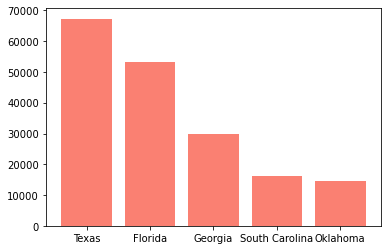

In [109]:
#Check the values of sales of top 5 states
plt.bar(df_temp.state.unique()[:5],df_temp.state.value_counts()[:5], color= 'salmon' )

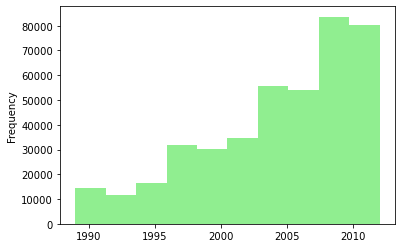

In [106]:
df_temp.saleYear.plot.hist(color='lightgreen');

## 5. Preprocessing

### Converting Strings to categories

In [147]:
### Convert string to categories
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [114]:
#Use pd api to find the columns which contains strings
str_labels = []
for label, value in df_temp.items():
    if pd.api.types.is_string_dtype(value):
        str_labels.append(label)
str_labels

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [141]:
## Coverting the string values to categorical values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [143]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [148]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Filling the missing values

#### Filling numeric msiing values 

In [149]:
df_temp.isna().sum()/len(df_temp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [151]:
#Save the preprocessed data
df_temp.to_csv('data/buldozers-modified-data.csv', index=False)

In [155]:
#Fill numeric columns with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary columns which tell if the data was missing
            df_temp[label+'_is_missing'] = pd.isnull(content)
            #Fill misiing number with the median
            df_temp[label] = content.fillna(content.median())

In [159]:
#Check to see
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(df_temp[label])

In [160]:
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

#### Filling categorical Values

In [162]:
#Turn categorical variables into numbers and fill missing

for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add the binary column to indicate whether sample had missing value
        df_temp[label+'_is_missing'] = pd.isnull(content)
        #Turn categories into numbers and adding 1 as -1 stands for missing values
        df_temp[label] = pd.Categorical(content).codes + 1

In [164]:
pd.Categorical(df_temp['UsageBand'])

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 412698
Categories (4, int64): [0, 1, 2, 3]

In [167]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 97.2 MB


In [169]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [170]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [175]:
df_temp.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 103, dtype: object

## 6. Fitting Models

In [176]:
len(df_temp)

412698

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
%%time
#Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

#Fit the model
model.fit(df_temp.drop("SalePrice", axis=1), df_temp['SalePrice'])

Wall time: 9min 31s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [181]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp['SalePrice'])

0.9875468079970562

### Creating our own validation set 

In [184]:
#Splitting data into train and validation sets
df_temp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

According to kaggle data set, all the data before 2011 is training data, and all the data after 2011 is out validation test.

In [185]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [197]:
train = df_temp[df_temp['saleYear']<=2011]
val = df_temp[df_temp['saleYear']>2011]
len(train), len(val)

(401125, 11573)

In [202]:
#Split data
x_train,y_train = train.drop('SalePrice', axis=1), train['SalePrice']
x_valid, y_valid = val.drop('SalePrice', axis=1), val['SalePrice']
x_train.shape, x_valid.shape

((401125, 102), (11573, 102))

### Making a evaluation function for more training more models

In [211]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rsmle(y_test, y_preds):
    '''
    calculates root mean squared log error
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create evaluation function
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Validation MAE": mean_absolute_error(y_valid, val_preds),
             "Training RSLME": rsmle(y_train, train_preds),
             "Validation RSLME": rsmle(y_valid, val_preds),
             "Training": r2_score(y_train, train_preds),
             "Validation RSMLE": r2_score(y_valid, val_preds)}
    return scores

### Testing and training models

In [213]:
%%time
# Testing out model on a subset to tune hyperparameters
model = RandomForestRegressor(n_jobs=-1, random_state=42,max_samples=10000)
model.fit(x_train, y_train)

Wall time: 2min 25s


RandomForestRegressor(max_samples=100000, n_jobs=-1, random_state=42)

In [214]:
show_scores(model)

{'Training MAE': 3588.5677039077596,
 'Validation MAE': 6193.733662835912,
 'Training RSLME': 0.17533085989490504,
 'Validation RSLME': 0.25674596551158657,
 'Training': 0.9389791835237717,
 'Validation RSMLE': 0.8710523572862298}

### Hyperparameter tuning with `RandomizedSearchCV`

In [332]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor Hyperparameters
rf_grid = {"n_estimators": [40,60],
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             cv = 5,
                             n_iter=100,
                             verbose=True)

#Fitting the model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Wall time: 57min 47s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [40, 60]},
                   verbose=True)

In [333]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [335]:
#Evaluating the RandmizedSearchCV model
show_scores(rs_model)

{'Training MAE': 5734.533713593647,
 'Validation MAE': 7311.911848785281,
 'Training RSLME': 0.26336362349469056,
 'Validation RSLME': 0.295778560531261,
 'Training': 0.850147558711838,
 'Validation RSMLE': 0.8210916709895012}

In [336]:
%%time
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(x_train, y_train)

Wall time: 1min 41s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

## Make Predictions on the test data

In [309]:
#importing the test data csv

df_test = pd.read_csv('data/Test.csv',parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [310]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Getting the test data set in the same format as the training data set

In [311]:
def preprocess_data(df):    
    '''
    Performs transformation of df and returns a formatted df
    '''
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfyear']  = df.saledate.dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            
            if pd.isnull(content).sum():
                #Add a binary columns which tell if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                #Fill misiing number with the median
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df_temp[label] = content.astype('category').cat.as_ordered()
            df[label+'_is_missing'] = pd.isnull(content)                
            #adding +1 t0 categorical label
            df[label] = pd.Categorical(content).codes + 1
    
    return df            

In [312]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [316]:
df_test.shape, x_train.shape

((12457, 101), (401125, 102))

In [317]:
#There is a difference in the number of columns in the trained and test dataset
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [319]:
#Manually adjust df_test to have auctioneer_id_is_missing
df_test['auctioneerId_is_missing']= False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerId_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


### Predicting the results

In [322]:
#Predicitng the results
test_preds = model.predict(df_test)
test_preds

array([19917. , 23391. , 46755. , ..., 12356.5, 16505. , 28327.5])

In [323]:
len(test_preds), len(df_test)

(12457, 12457)

Format the predictions the same format Kaggle expects
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


In [326]:
#Formatting
final_df = pd.DataFrame()
final_df['SalesID'] = df_test['SalesID']
final_df['SalesPrice'] = test_preds
final_df

,SalesID,SalesPrice
0,1227829,19917.0
1,1227844,23391.0
2,1227847,46755.0
3,1227848,84045.0
4,1227863,47183.0
...,...,...
12452,6643171,49640.0
12453,6643173,11350.0
12454,6643184,12356.5
12455,6643186,16505.0


## Feature importance

In [331]:
model.feature_importances_

array([4.99004881e-02, 1.78828424e-02, 3.13180048e-02, 6.12493624e-04,
       4.83198432e-03, 2.61227054e-01, 3.40242848e-03, 1.17485826e-03,
       1.92917178e-02, 6.37915644e-02, 5.53771700e-02, 4.67249349e-03,
       3.63408713e-03, 2.27008714e-01, 3.83687074e-02, 9.29301975e-03,
       3.63260481e-04, 3.64636663e-04, 1.56268898e-03, 9.35341922e-03,
       5.25298418e-04, 4.29188050e-05, 7.16261271e-04, 1.79642089e-04,
       1.27918781e-03, 2.69037207e-05, 2.11748294e-04, 1.52829103e-02,
       5.09180853e-04, 1.16633904e-03, 3.28815437e-03, 2.95637770e-03,
       2.45814436e-03, 1.45034427e-03, 1.03358071e-03, 2.08505027e-03,
       1.14600142e-03, 1.56628561e-02, 9.46511568e-06, 4.02894616e-06,
       2.02211621e-04, 1.21004236e-03, 1.37747489e-03, 8.09732940e-04,
       3.53335014e-04, 6.00171430e-04, 2.30273756e-04, 1.98659440e-03,
       1.00228698e-03, 2.00231849e-04, 1.97103230e-04, 7.34796268e-02,
       3.78683277e-03, 9.94217211e-03, 5.01767288e-03, 1.41300114e-02,
      

In [350]:
#Install Seaborn package in current environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn
import seaborn as sns

Solving environment: ...working... done

# All requested packages already installed.



In [357]:
#Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
    df =(pd.DataFrame({"features":columns,
                      "feature_importances": importances})
                     .sort_values("feature_importances", ascending = False).reset_index(drop=True))
    
    #Plot the dataframe
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.barplot(x="feature_importances",
                y="features",
                data=df[:n],
                orient="h")
    

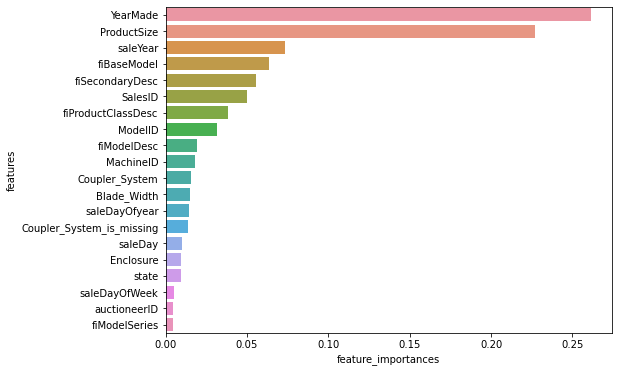

In [358]:
plot_features(x_train.columns, model.feature_importances_)

*** Note: Yet to try CatBoost.ai and XGBoost.ai ***